<a href="https://colab.research.google.com/github/bryh311/FreeCodeCamp-ML/blob/main/bryce_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [3]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255
)
validation_image_generator = ImageDataGenerator(
    rescale=1./255
)
test_image_generator = ImageDataGenerator(
    rescale=1./255
)
train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    'cats_and_dogs',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    batch_size=1,
    class_mode=None,
    classes=['test']
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


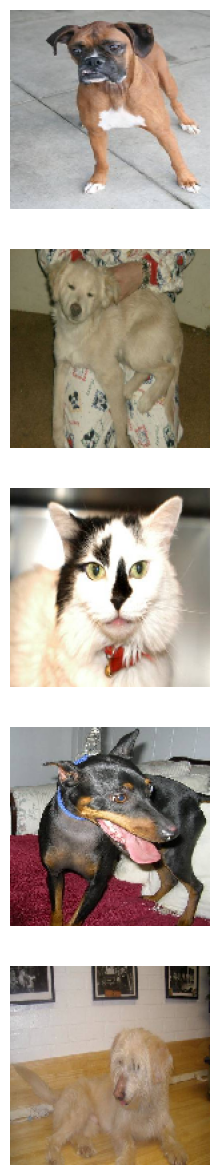

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [13]:
# 5
batch_size = 32
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


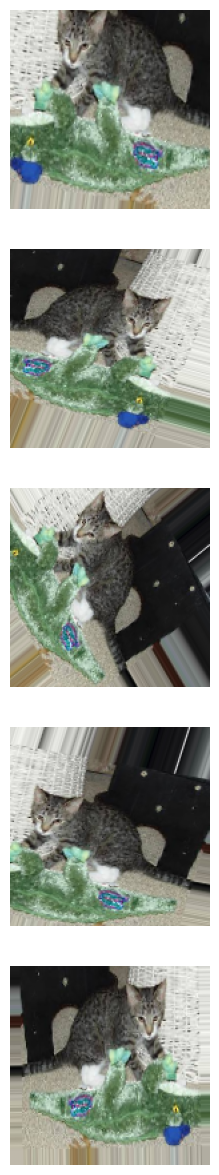

In [14]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [15]:
# 7
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [20]:
# 8
history = model.fit(train_data_gen, epochs=20, validation_data=val_data_gen, validation_steps=10)

Epoch 1/20
63/63 [==============================] - 14s 230ms/step - loss: 0.2157 - accuracy: 0.6630 - val_loss: 0.2970 - val_accuracy: 0.5500
Epoch 2/20
63/63 [==============================] - 15s 231ms/step - loss: 0.2177 - accuracy: 0.6555 - val_loss: 0.1835 - val_accuracy: 0.7281
Epoch 3/20
63/63 [==============================] - 15s 232ms/step - loss: 0.2107 - accuracy: 0.6800 - val_loss: 0.2413 - val_accuracy: 0.6000
Epoch 4/20
63/63 [==============================] - 15s 232ms/step - loss: 0.2023 - accuracy: 0.7005 - val_loss: 0.2095 - val_accuracy: 0.6719
Epoch 5/20
63/63 [==============================] - 15s 232ms/step - loss: 0.2027 - accuracy: 0.6915 - val_loss: 0.1878 - val_accuracy: 0.7250
Epoch 6/20
63/63 [==============================] - 15s 232ms/step - loss: 0.2027 - accuracy: 0.6910 - val_loss: 0.1875 - val_accuracy: 0.7031
Epoch 7/20
63/63 [==============================] - 14s 228ms/step - loss: 0.2012 - accuracy: 0.6870 - val_loss: 0.1835 - val_accuracy: 0.7406

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy') # its always interesting when a line of code works many times and you change nothing and it breaks
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
#10

probabilities = model.predict(test_data_gen).flatten()
print(probabilities)

50/50 [==============================] - 0s 3ms/step
[ 0.7088024   0.30450016 -0.0111945   0.8093783   0.435675    0.4912505
  0.5957597   0.22623149  0.7053193   0.8459239   0.29283288  0.6182247
  0.2968998   0.18361045  0.56840396  0.47102332  0.5011059   0.7982839
  0.71857744  0.6264412  -0.05547339  0.5428712   0.37071306  0.2891747
  0.58990353  0.37660414  0.9417554   0.38921624  0.24647087  0.5526052
  0.11932611 -0.0077998   1.13621     1.6923594   0.3681849   0.5268713
  1.2442238   0.91510653  0.45560324  0.2840643   0.39344928  0.27730086
  1.4308174   0.7031507  -0.03296902  0.31560707  0.51385045  0.04897467
  0.37501895  0.22833993]


In [23]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
